In [1]:
library(naturalsort)
library(fields)
library(rasterImage)
library(pracma) # only needed for moving-average plot
n=256
cols = rainbow(n, s = 1, v = 1, start = 0.7, end = 0, alpha = 1)

Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.2-0 (2018-06-19) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
See www.image.ucar.edu/~nychka/Fields for
 a vignette and other supplements. 
Loading required package: plotrix

Attaching package: ‘plotrix’

The following object is masked from ‘package:fields’:

    color.scale



## Population size time series

In [2]:
flst <- naturalsort(list.files('~/jackgl/Data/Simulations/sims080818/lung/')) # File names are same for each directory (lung, colon, brain)
res <- array(0,dim=c(5,5))

In [3]:
dataDir <- '~/jackgl/Data/Simulations/sims080818/brain/'
Ns <- list()
j <- 1
for (i in 1:5) {
    load(paste0(dataDir,flst[i]))
    Ns[[j]] <- N
    j <- j+1
}

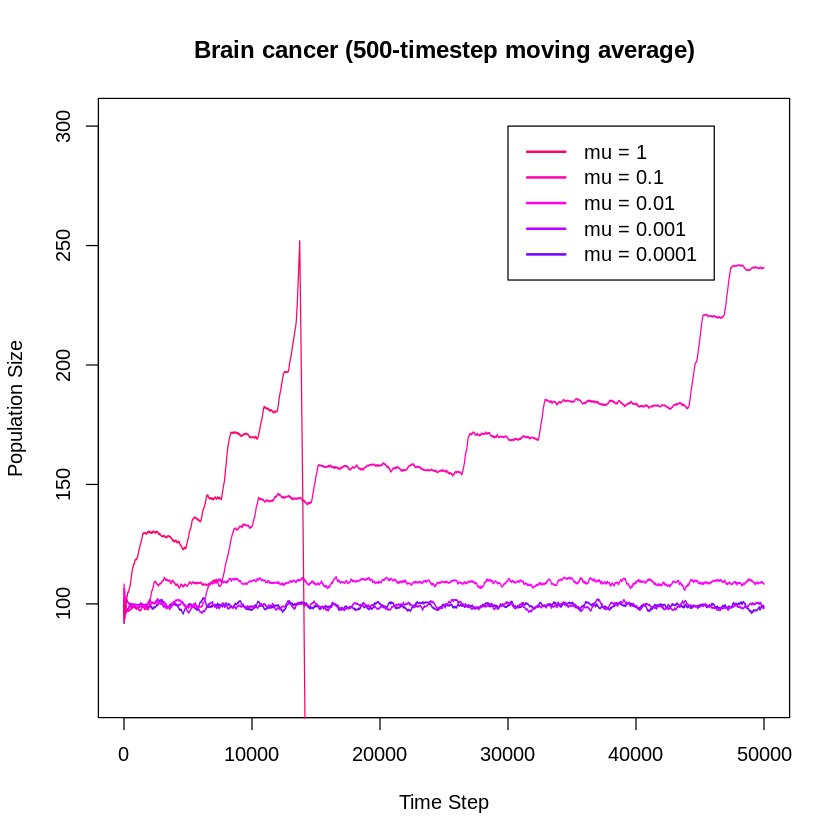

In [4]:
# plot(1:length(Ns[[1]]),Ns[[1]],type='l',xlab='Timestep',ylab='Population Size',ylim=c(0,200),col=cols[1*40])
# for (i in 2:5) {lines(1:length(Ns[[i]]),Ns[[i]],type='l',xlab='Timestep',ylab='Population Size',ylim=c(0,200),col=cols[i*40])}

plot(1:length(Ns[[1]]),movavg(Ns[[1]],500,'s'),type='l',main='Brain cancer (500-timestep moving average)',xlab='Time Step',ylab='Population Size',ylim=c(min(Ns[[1]]),max(Ns[[5]])),col=cols[1*40])
for (i in 2:5) {lines(1:length(Ns[[i]]),movavg(Ns[[i]],500,'s'),type='l',xlab='Time Step',ylab='Population Size',ylim=c(0,200),col=cols[i*40])}
legend(30000,300,legend=c("mu = 1","mu = 0.1","mu = 0.01","mu = 0.001","mu = 0.0001"),lty=1,lwd=2,col = cols[c(200,160,120,80,40)])

mu is the L1 insertion rate per cell cycle (unique to each cell; proportional to birth rate)

Note in the above graph that the trajectory for mu=1 cuts off before reaching triple the initial population size. That is because this is a moving average plot.

In [5]:
dataDir <- '~/jackgl/Data/Simulations/sims080818/brain/'
Ns <- list()
mui <- 5
j <- 1
for (i in 1:5) {
    load(paste0(dataDir,flst[((i-1)*5)+mui]))
    print(flst[((i-1)*5)+mui])
    N[N==0] <- NA
    Ns[[j]] <- N
    j <- j+1
}

[1] "run_n0100_5.rda"
[1] "run_n0500_10.rda"
[1] "run_n01000_15.rda"
[1] "run_n02000_20.rda"
[1] "run_n05000_25.rda"


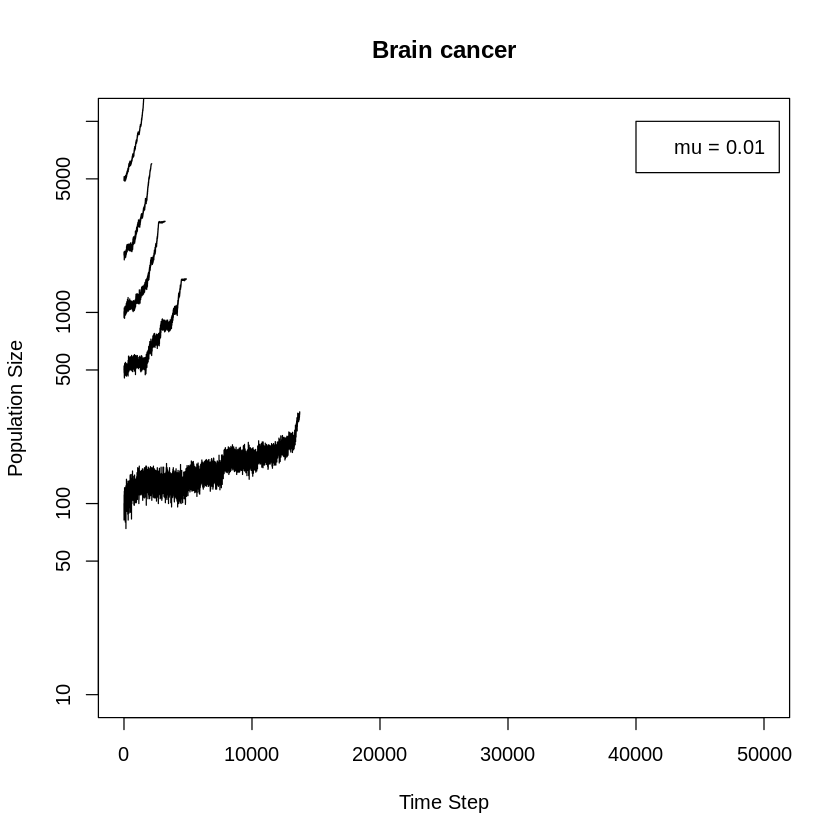

In [6]:
plot(1:length(Ns[[1]]),Ns[[1]],type='l',main='Brain cancer',xlab='Time Step',ylab='Population Size',ylim=c(10,1e4),log='y')
for (i in 2:5) {lines(1:length(Ns[[i]]),Ns[[i]],type='l',xlab='Time Step',ylab='Population Size')}
legend(40000,10000,legend=c("mu = 0.01"),lty=0)

## Heat maps

In [7]:
dataDir <- '~/jackgl/Data/Simulations/sims080818/lung/'
simc <- 1
for (n0 in 1:5) {
    for (mu in 1:5) {
        
        load(paste0(dataDir,flst[simc]))
#         N <- movavg(N,500,'s')
        if (max(N)>=3*N[1]) {res[n0,mu] <- max(N)/N[1]}
        else {res[n0,mu] <- tail(N,n=1)/N[1]}
        simc <- simc+1
        
    }
}
res
res[2,5]

1.0500,0.9900,0.9500,3.0000,3.0300
1.1180,0.9960,3.0000,3.0000,3.0000
1.0170,1.2130,3.0000,3.0000,3.0000
1.0010,1.2425,3.0005,3.0000,3.0000
1.0718,3.0004,3.0000,3.0008,3.0004


[1] 3

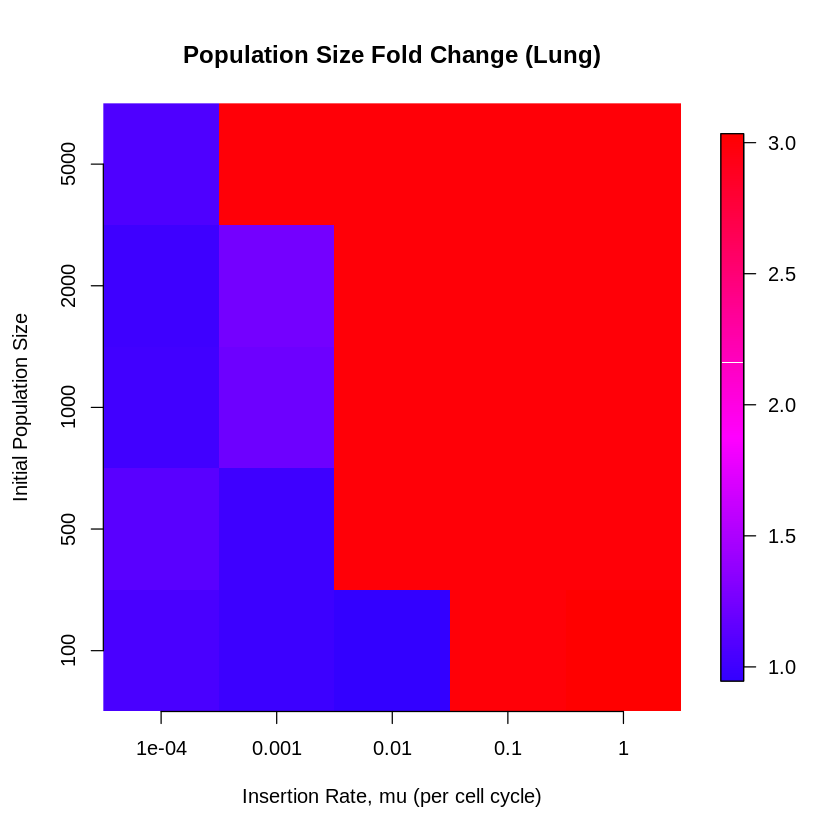

In [8]:
# rotate <- function(x) t(apply(x, 2, rev))
image.plot(t(res),axes=F,col=cols)
title(main="Population Size Fold Change (Lung)",xlab='Insertion Rate, mu (per cell cycle)',ylab='Initial Population Size');
axis(1, at=seq(0,1,0.25), labels=c(1e-4,1e-3,1e-2,1e-1,1e-0)); 
axis(2, at=seq(0,1,0.25), labels=c(1e2,5e2,1e3,2e3,5e3)); 

In [9]:
dataDir <- '~/jackgl/Data/Simulations/sims080818/colon/'
simc <- 1
for (n0 in 1:5) {
    for (mu in 1:5) {
        
        load(paste0(dataDir,flst[simc]))
#         N <- movavg(N,500,'s')
        if (max(N)>=3*N[1]) {res[n0,mu] <- max(N)/N[1]}
        else {res[n0,mu] <- tail(N,n=1)/N[1]}
        simc <- simc+1
        
    }
}
res
res[2,5]

1.1700,1.0600,1.5200,3.0100,3.0200
1.0060,1.1440,3.0020,3.0040,3.0020
1.0720,0.9870,3.0000,3.0070,3.0000
1.0070,3.0000,3.0005,3.0000,3.0005
1.2162,3.0002,3.0014,3.0004,3.0002


[1] 3.002

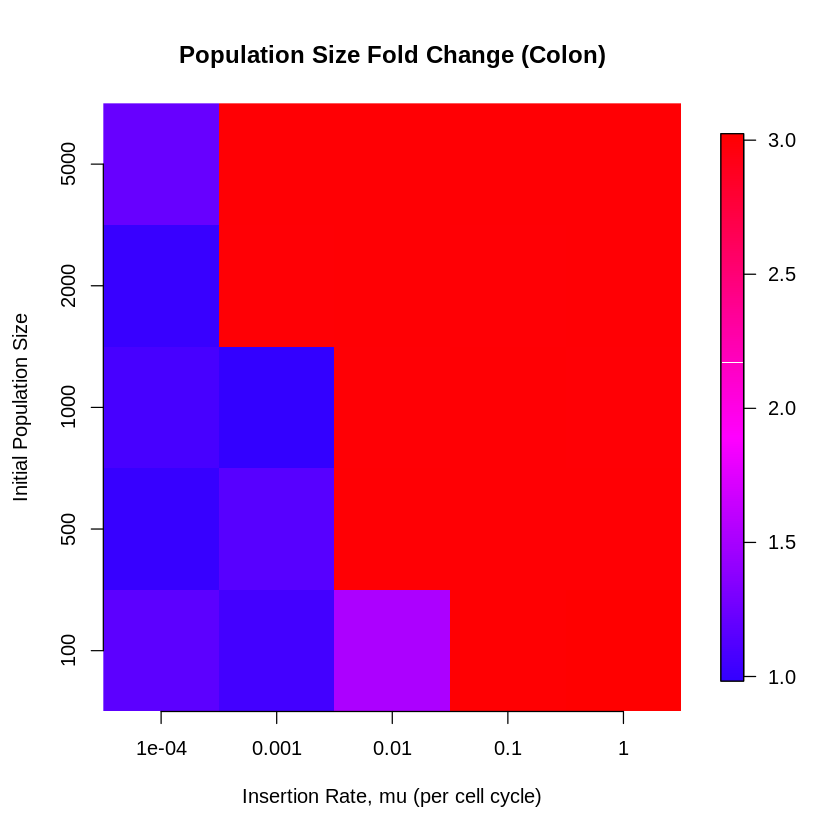

In [10]:
# rotate <- function(x) t(apply(x, 2, rev))
image.plot(t(res),axes=F,col=cols)
title(main="Population Size Fold Change (Colon)",xlab='Insertion Rate, mu (per cell cycle)',ylab='Initial Population Size');
axis(1, at=seq(0,1,0.25), labels=c(1e-4,1e-3,1e-2,1e-1,1e-0)); 
axis(2, at=seq(0,1,0.25), labels=c(1e2,5e2,1e3,2e3,5e3)); 

In [11]:
dataDir <- '~/jackgl/Data/Simulations/sims080818/brain/'
simc <- 1
for (n0 in 1:5) {
    for (mu in 1:5) {
        
        load(paste0(dataDir,flst[simc]))
#         N <- movavg(N,500,'s')
        if (max(N)>=3*N[1]) {res[n0,mu] <- max(N)/N[1]}
        else {res[n0,mu] <- tail(N,n=1)/N[1]}
        simc <- simc+1
        
    }
}
res
res[2,5]

1.0300,1.0900,1.0600,2.4500,3.0200
0.9580,1.0280,0.9660,3.0000,3.0000
1.0110,0.9920,1.1130,3.0000,3.0000
0.9795,1.0020,1.3415,3.0000,3.0000
0.9924,1.0902,3.0002,3.0002,3.0002


[1] 3

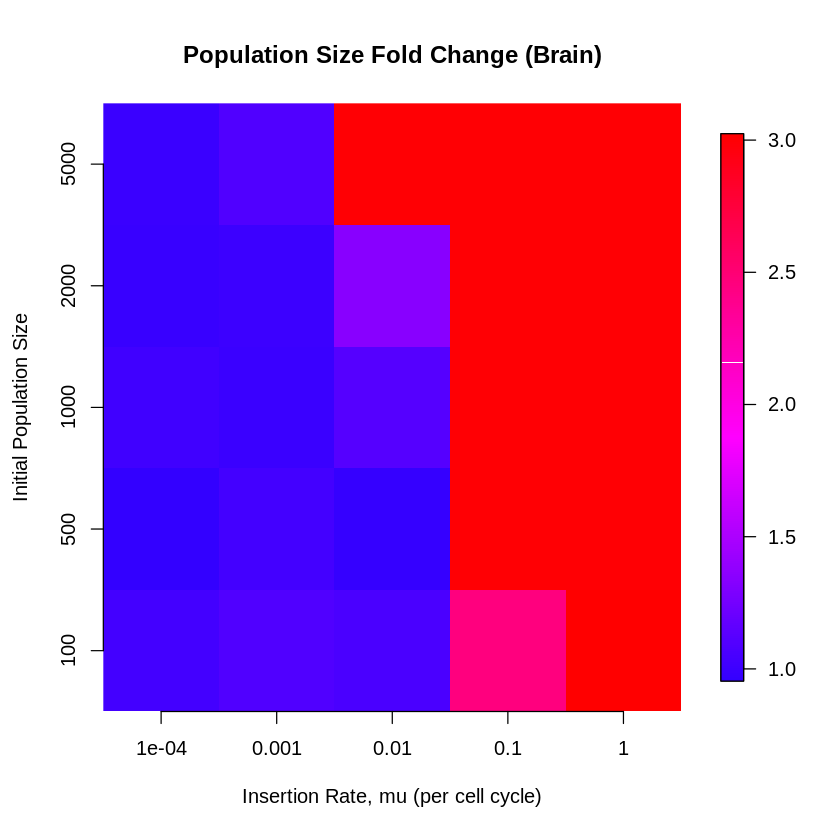

In [12]:
# rotate <- function(x) t(apply(x, 2, rev))
image.plot(t(res),axes=F,col=cols)
title(main="Population Size Fold Change (Brain)",xlab='Insertion Rate, mu (per cell cycle)',ylab='Initial Population Size');
axis(1, at=seq(0,1,0.25), labels=c(1e-4,1e-3,1e-2,1e-1,1e-0)); 
axis(2, at=seq(0,1,0.25), labels=c(1e2,5e2,1e3,2e3,5e3)); 